In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Google Colab Datasets/healthcare-dataset-stroke-data.csv")

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

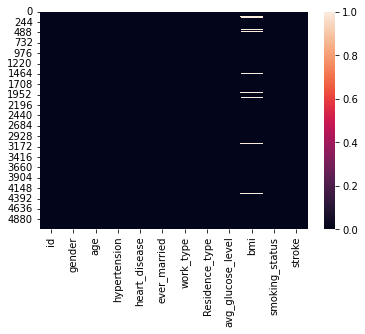

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [11]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

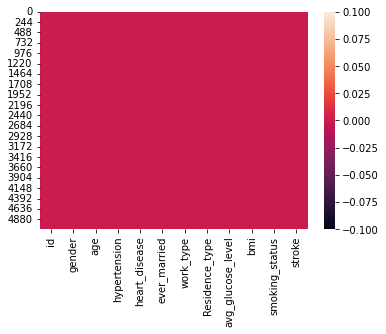

In [14]:
sns.heatmap(df.isnull())

**Feature Selection**

In [15]:
df.drop('id',axis =1,inplace = True)

In [16]:
df.shape

(5110, 11)

**Get overall statistics of the dataset**

In [17]:
df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Correlation Matrix**

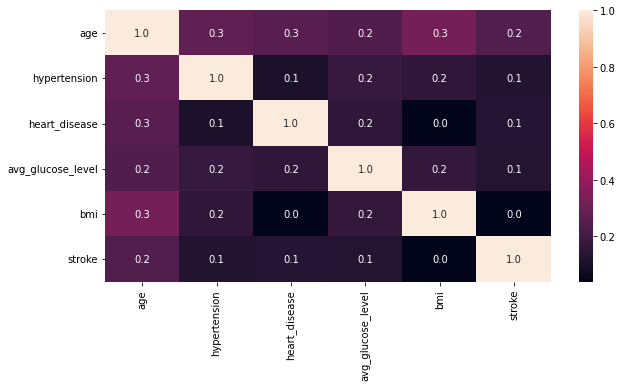

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

**Outlier Check** 

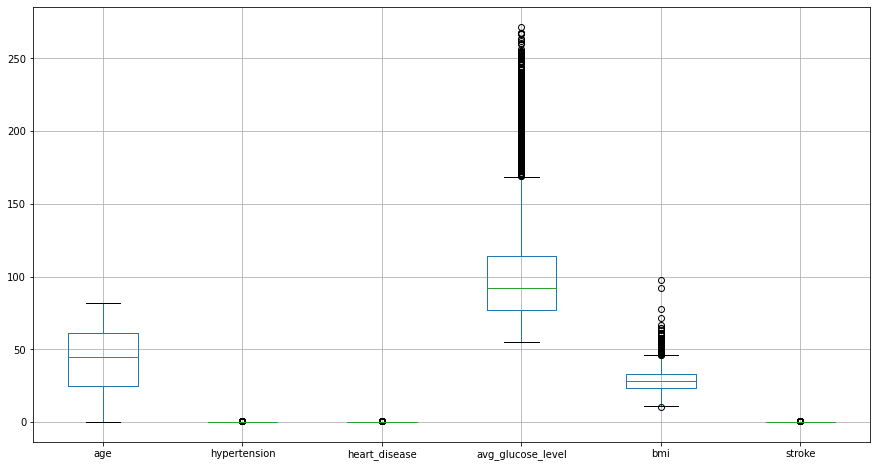

In [20]:
df.boxplot(column=['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke'],figsize=(15,8))

**LABELENCODER - Convert Object type to int type**

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df[df.select_dtypes(include=['object']).columns]  =  df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [25]:
df['gender'].unique()

array([1, 0, 2])

**Check for imbalanced dataset**

In [26]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


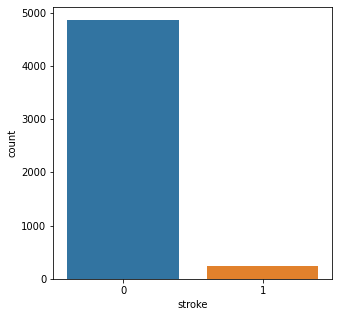

In [27]:
fig = plt.subplots(figsize=(5,5))
sns.countplot(df['stroke'])

**Sampling data**

In [28]:
x= df.drop(['stroke'],axis=1)
y= df['stroke']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Handling the imbalanced data**

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [33]:
y_res.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

**Feature Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

In [37]:
x_train

array([[ 1.44901423, -0.3699695 , -0.30225089, ..., -0.62152879,
        -0.07935194, -0.2823223 ],
       [-0.68931284, -0.08837091, -0.30225089, ...,  0.85163854,
        -0.04846336, -1.31604195],
       [-0.68931284, -0.67921911, -0.30225089, ..., -0.44043082,
        -0.8869032 ,  0.75139735],
       ...,
       [ 1.44901423,  0.8802504 , -0.30225089, ...,  2.68474388,
         0.31315105,  1.78511699],
       [-0.68931284, -0.40771152, -0.30225089, ..., -0.32764968,
         3.20883328,  1.78511699],
       [-0.68931284,  0.35821306, -0.30225089, ...,  1.64806128,
         0.19197564,  0.75139735]])

**Applying Principal Component Analysis(PCA)**

In [38]:
#from sklearn.decomposition import PCA

In [39]:
#pca = PCA(n_components=9/11) #retain 90% of the information

In [40]:
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

In [41]:
#pca.explained_variance_ratio_ # from 11 features it is reduced to 7 features retaining 90% of the information

In [42]:
#sum(pca.explained_variance_ratio_)

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred = log.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8015424164524422

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       975
           1       0.79      0.82      0.81       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



**Confusion Matrix for Logistic Regression**

In [48]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


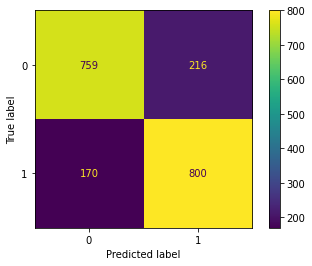

In [49]:
plot_confusion_matrix(log,x_test, y_test) 
plt.show()

**ROC-AUC curve for Logistic Regression**

In [50]:
from sklearn.metrics import roc_curve

In [51]:
pred_prob1 = log.predict_proba(x_test)

In [52]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1) # roc curve for model

In [53]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.8837092254824214


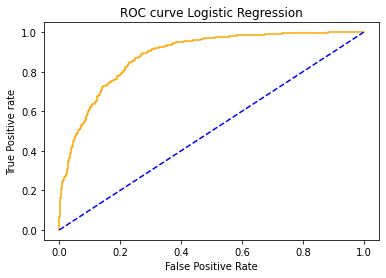

In [56]:
plt.plot(fpr1, tpr1,color='orange')
plt.plot(p_fpr,p_tpr, linestyle ='--',color='blue')
plt.title('ROC curve Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

**Support Vector classifier**

In [57]:
from sklearn import svm

In [58]:
svm = svm.SVC(gamma='auto', probability=True)

In [59]:
svm.fit(x_train,y_train)

SVC(gamma='auto', probability=True)

In [60]:
y_pred2 = svm.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred2)

0.8596401028277635

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       975
           1       0.83      0.91      0.87       970

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



**Confusion Matrix for Support Vector Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


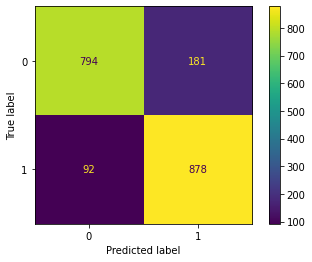

In [63]:
plot_confusion_matrix(svm,x_test, y_test) 
plt.show()

**ROC-AUC curve for SVC**

In [64]:
from sklearn.metrics import roc_curve

In [65]:
pred_prob2 = svm.predict_proba(x_test)

In [66]:
fpr2, tpr2, thresh1 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [67]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
auc_score1 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score1)

0.9295247158339943


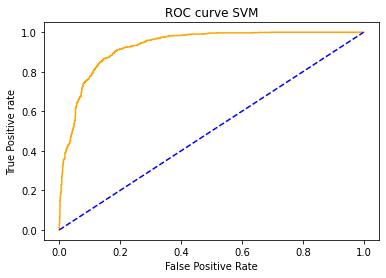

In [70]:
plt.plot(fpr2, tpr2,color='orange')
plt.plot(p_fpr,p_tpr, linestyle ='--',color='blue')
plt.title('ROC curve SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

**KNeighbors Classifier**

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred3 = knn.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred3)

0.8760925449871465

In [76]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       975
           1       0.83      0.94      0.88       970

    accuracy                           0.88      1945
   macro avg       0.88      0.88      0.88      1945
weighted avg       0.88      0.88      0.88      1945



**Confusion Matrix for KNN**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


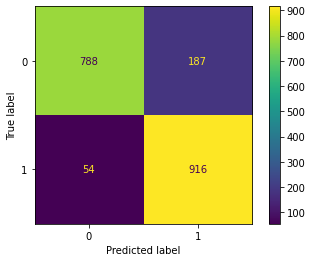

In [77]:
plot_confusion_matrix(knn,x_test, y_test) 
plt.show()

**Decision Tree Classifier**

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier()

In [80]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred4 = dt.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred4)

0.9023136246786633

In [83]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       975
           1       0.89      0.92      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



**Random Forest Classifier**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
y_pred5 = rf.predict(x_test)

In [88]:
accuracy_score(y_test,y_pred5)

0.9470437017994858

In [89]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       975
           1       0.93      0.97      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



**Gradient Boosting classifier**

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gbc = GradientBoostingClassifier()

In [92]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [93]:
y_pred6 = gbc.predict(x_test)

In [94]:
accuracy_score(y_test,y_pred6)

0.8699228791773779

In [95]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       975
           1       0.84      0.91      0.87       970

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945



**Naive Bayes**

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
nb = GaussianNB()

In [98]:
nb.fit(x_train, y_train)

GaussianNB()

In [99]:
y_pred7 = nb.predict(x_test)

In [100]:
accuracy_score(y_test,y_pred7)

0.7840616966580977

In [101]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       975
           1       0.75      0.86      0.80       970

    accuracy                           0.78      1945
   macro avg       0.79      0.78      0.78      1945
weighted avg       0.79      0.78      0.78      1945



In [102]:
final_data = pd.DataFrame({'Models': ['LR','SVC','KNN','DT','RFC','GBC','NB'], 'Accuracy' : [accuracy_score(y_test,y_pred)*100,accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred3)*100,accuracy_score(y_test,y_pred4)*100,accuracy_score(y_test,y_pred5)*100,accuracy_score(y_test,y_pred6)*100,accuracy_score(y_test,y_pred7)*100]})

In [103]:
final_data

,Models,Accuracy
0,LR,80.154242
1,SVC,85.964010
2,KNN,87.609254
3,DT,90.231362
4,RFC,94.704370
5,GBC,86.992288
6,NB,78.406170


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


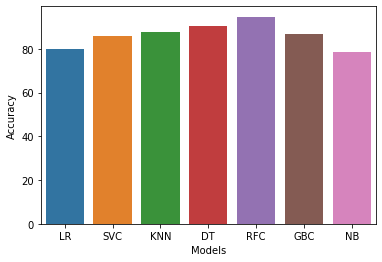

In [104]:
sns.barplot(final_data['Models'],final_data['Accuracy'])